In [26]:
import pandas as pd

## Model Training

In [37]:
df = pd.read_csv('C:\\Users\\91958\\Desktop\\Jupyter file\\dataset\\eda_results.csv')
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,4,3,4,62.2,58.0,13619
1,2.03,3,7,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453


In [28]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [29]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [30]:
X_train.head()

,carat,cut,color,clarity,depth,table
168192,0.34,5,6,6,60.9,57.0
35202,0.90,2,2,3,63.8,57.0
41091,1.02,4,4,5,62.7,58.0
31239,0.32,4,4,4,62.1,59.0
45722,0.35,5,7,6,61.1,56.0


In [31]:
## Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
print(X_train_scaled[:5])

[[-0.97543926  0.87407553  1.52872212  1.35273128 -0.84960654 -0.12153081]
 [ 0.2351953  -2.14455824 -0.93507064 -0.64678628  1.83363716 -0.12153081]
 [ 0.49461699 -0.13213573  0.29682574  0.68622543  0.81585507  0.39980029]
 [-1.01867621 -0.13213573  0.29682574  0.01971957  0.2607012   0.92113138]
 [-0.95382079  0.87407553  2.14467031  1.35273128 -0.66455525 -0.6428619 ]]


In [33]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:5]

array([[-0.56468825, -0.13213573, -0.93507064,  0.01971957, -0.94213218,
        -0.6428619 ],
       [-0.17555571, -1.13834698,  0.91277393, -0.64678628,  1.00090636,
        -0.12153081],
       [-1.06191316,  0.87407553,  0.91277393,  2.68574299,  0.2607012 ,
        -0.12153081],
       [ 0.97022342, -0.13213573,  0.29682574,  0.01971957, -0.20192702,
         1.96379357],
       [-0.93220231, -0.13213573, -0.93507064,  0.68622543, -1.31223476,
         0.39980029]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\91958\AppData\Local\Temp\ipykernel_5060\1937473500.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

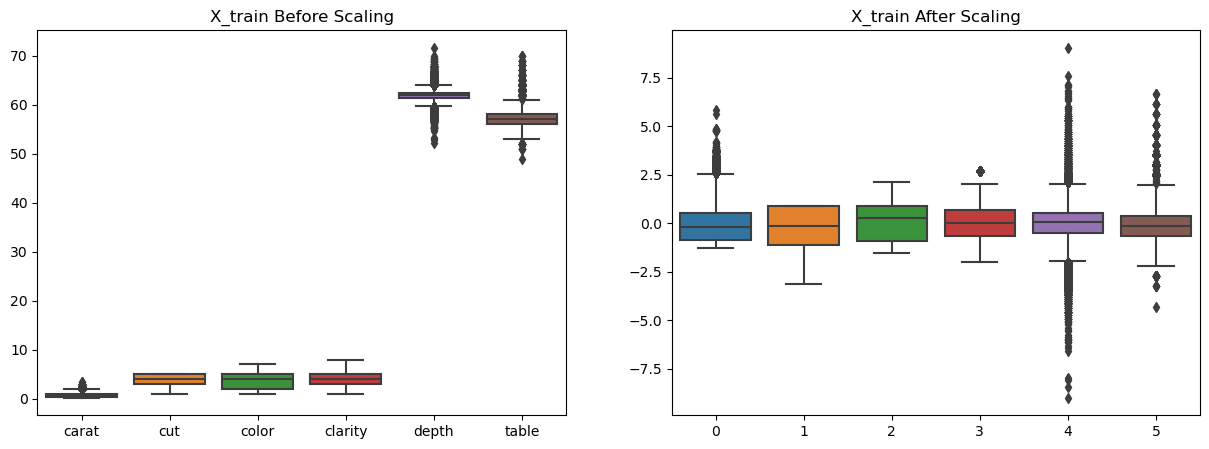

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

In [9]:


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
# pip install xgboost

In [11]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [11]:
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [12]:
regression.coef_

array([[4217.95110146,   82.28408958, -437.76616196,  736.92640134,
         -43.87559265,  -69.38106494]])

In [13]:
regression.intercept_

array([3970.76628955])

In [16]:
## Train multiple models

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elasticnet': ElasticNet(),
    'NaiveBayes': GaussianNB(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XG Boost': XGBRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score:", r2_square * 100)

    r2_list.append(r2_square)
    
    print('=' * 35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1099.6943843143683
MAE: 806.3805022561654
R2 score: 92.57592692715887


Lasso
Model Training Performance
RMSE: 1099.7069774708552
MAE: 806.0621049087163
R2 score: 92.57575689255539


Ridge
Model Training Performance
RMSE: 1099.6945713392045
MAE: 806.3751566212787
R2 score: 92.57592440193699


Elasticnet
Model Training Performance
RMSE: 1831.6727904144902
MAE: 1240.0069014913747
R2 score: 79.40347225345818




C:\Users\91958\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NaiveBayes
Model Training Performance
RMSE: 2810.3342093267124
MAE: 1523.1618852459017
R2 score: 51.51424494217163


Decision Tree
Model Training Performance
RMSE: 826.3822440817225
MAE: 418.071418381544
R2 score: 95.80762446743297




C:\Users\91958\AppData\Local\Temp\ipykernel_2148\247969503.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest
Model Training Performance
RMSE: 638.8751054314458
MAE: 330.01688181769373
R2 score: 97.49429375992604


XG Boost
Model Training Performance
RMSE: 590.8266077550936
MAE: 301.34185941154624
R2 score: 97.85701903151842




In [17]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'NaiveBayes',
 'Decision Tree',
 'Random Forest',
 'XG Boost']

In [14]:
XGBoost = XGBRegressor()

In [15]:
XGBoost

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
XGBoost.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
y_pred_test = XGBoost.predict(X_test_scaled)

In [22]:
y_pred_test

array([ 1740.5641,  2171.593 ,   825.7841, ...,  1952.135 ,   830.3984,
       13986.199 ], dtype=float32)

## Pickling

In [23]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(XGBoost,open('XGBoost.pkl','wb'))